In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dtype = {'file' : 'str', 'time' : np.float64, '#nodes' : np.float64, 'pathlength' : np.float64, 'horizon' : np.float64, '#moves' : np.float64, 'init_conflicts' : np.float64}

df = pd.read_csv("./benchmarkResults/cbs2.csv", dtype = dtype)
dfg = pd.read_csv("./benchmarkResults/greedy2.csv", dtype = dtype)

dfg

,file,time,#nodes,pathlength,horizon,#moves,init_conflicts
0,benchmark_examples/size5x5/density20/ex1.lp,0.634905,6.0,4.0,5.0,14.0,4.0
1,benchmark_examples/size5x5/density20/ex10.lp,0.067301,2.0,0.0,5.0,17.0,0.0
2,benchmark_examples/size5x5/density20/ex2.lp,0.952244,6.0,4.0,6.0,23.0,6.0
3,benchmark_examples/size5x5/density20/ex3.lp,0.327328,3.0,1.0,7.0,21.0,2.0
4,benchmark_examples/size5x5/density20/ex4.lp,0.644883,4.0,2.0,7.0,22.0,4.0
...,...,...,...,...,...,...,...
195,benchmark_examples/size8x8/density40/ex5.lp,28.952809,137.0,77.0,11.0,166.0,86.0
196,benchmark_examples/size8x8/density40/ex6.lp,25.429027,126.0,74.0,13.0,174.0,66.0
197,benchmark_examples/size8x8/density40/ex7.lp,136.188923,550.0,195.0,15.0,238.0,76.0
198,benchmark_examples/size8x8/density40/ex8.lp,39.036245,189.0,119.0,14.0,214.0,70.0


In [3]:
def size(row):
    return int(str(row["file"]).split("/")[1][-1])

def density(row):
    return int(str(row["file"]).split("/")[2][-2:])

def ex(row):
    return int(str(row["file"]).split("/")[3][2])

df['size'] = df.apply(lambda row: size(row), axis=1)
df['density'] = df.apply(lambda row: density(row), axis=1)
df['ex'] = df.apply(lambda row: ex(row), axis=1)

dfg['size'] = df.apply(lambda row: size(row), axis=1)
dfg['density'] = df.apply(lambda row: density(row), axis=1)
dfg['ex'] = df.apply(lambda row: ex(row), axis=1)

In [4]:
# sort data by size + density

def sort_by_category(to_sort):
    '''returns list of DataFrames'''
    lcg = [] #(List of Categorised Groups)
    for i in range(int((len(to_sort))/10)):
        lcg.append(to_sort.iloc[(i*10):(i*10+10)])
    return lcg

# list of DataFrames, split by size + density
catList = sort_by_category(df)
greedyCatList = sort_by_category(dfg)

# for every df in received list, 
# calculate how many NaN rows are in there
# returns: list of int

def nan_counter(cat_df):
    lc = [] # List of Counts
    for elem in cat_df:
        counter = 0
        for i in range(10):
            if np.isnan(elem["time"].iloc[i]):
                counter += 1
        lc.append(counter)
    return lc

# list of NaN rows in cat_list df
nanList = nan_counter(catList)
greedyNanList = nan_counter(greedyCatList)

print(nanList)
print()

# calculate list of mean times 
def mean_list(df_list, nan_List):
    l = []
    counter = 0
    length = len(df_list[0])
    for elem in df_list:
        tempMean = elem.mean()[0]
        locNans = nan_List[counter]
        if(locNans != 0):
            if(locNans == length):
                tempMean = 300
            else: 
                tempMean = (tempMean * (length - locNans) + locNans * 300) / length
        l.append(tempMean)
        counter += 1
    return l

# list of mean times for each size + density combination
mean = mean_list(catList, nanList)
greedyMean = mean_list(greedyCatList, greedyNanList)
print(mean)

[0, 0, 0, 0, 1, 0, 1, 1, 2, 6, 0, 2, 5, 9, 10, 0, 6, 9, 9, 10]

[1.39555476539972, 0.8756736989991623, 2.160647639700619, 44.99356903209991, 76.75399048520194, 6.765908538600343, 38.01146451080058, 50.825647361299346, 76.74965869329972, 184.27932237050044, 19.979779531301027, 71.14807620970096, 159.26137715240037, 289.14665126590046, 300, 34.45567226349958, 261.54866784770127, 282.78692473479896, 276.0435580966994, 300]


In [5]:
def plotDensity(m,nl):
    points = [20,25,30,35,40]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[:5])
    ax2.scatter(points, m[5:10])
    ax3.scatter(points, m[10:15])
    ax4.scatter(points, m[15:])
    
    ax1.set_xlabel('density in %')
    ax1.set_ylabel('time in s')
    ax1.set_title('size: 5x5')
    ax2.set_xlabel('density in %')
    ax2.set_ylabel('time in s')
    ax2.set_title('size: 6x6')
    ax3.set_xlabel('density in %')
    ax3.set_ylabel('time in s')
    ax3.set_title('size: 7x7')
    ax4.set_xlabel('density in %')
    ax4.set_ylabel('time in s')
    ax4.set_title('size: 8x8')
    
    i = 0
    while i<20:
        if nl[i] > 3:
            if i < 5:
                ax1.vlines(points[i%5]-1, 0, maxM, color="red")
                i=5
                continue
            elif i < 10:
                ax2.vlines(points[i%5]-1, 0, maxM, color="red")
                i=10
                continue
            elif i < 15:
                ax3.vlines(points[i%5]-1, 0, maxM, color="red")
                i=15
                continue
            else:
                ax4.vlines(points[i%5]-1, 0, maxM, color="red")
                break
        i+=1

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()


    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()

    plt.show()
    
def plotSize(m, nl):
    points = [5,6,7,8]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)
    ax5 = fig.add_subplot(2, 3, 5, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[::5])

    for i in range(20)[::5]:
        if nl[i] > 3:
            ax1.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax2.scatter(points, m[1::5])

    for i in range(20)[1::5]:
        if nl[i] > 3:
            ax2.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax3.scatter(points, m[2::5])

    for i in range(20)[2::5]:
        if nl[i] > 3:
            ax3.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax4.scatter(points, m[3::5])

    for i in range(20)[3::5]:
        if nl[i] > 3:
            ax4.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax5.scatter(points, m[4::5])

    for i in range(20)[4::5]:
        if nl[i] > 3:
            ax5.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break
            
    ax1.set_xlabel('instance size')
    ax1.set_ylabel('time in s')
    ax1.set_title('density: 20%')
    ax2.set_xlabel('instance size')
    ax2.set_ylabel('time in s')
    ax2.set_title('density: 25%')
    ax3.set_xlabel('instance size')
    ax3.set_ylabel('time in s')
    ax3.set_title('density: 30%')
    ax4.set_xlabel('instance size')
    ax4.set_ylabel('time in s')
    ax4.set_title('density: 35%')
    ax5.set_xlabel('instance size')
    ax5.set_ylabel('time in s')
    ax5.set_title('density: 40%')

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()

    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    ax5.grid()

    plt.show()
    
def plotDensityNan(m):
    points = [20,25,30,35,40]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[:5])
    ax2.scatter(points, m[5:10])
    ax3.scatter(points, m[10:15])
    ax4.scatter(points, m[15:])
    
    ax1.set_xlabel('density in %')
    ax1.set_ylabel("number of Nan's")
    ax1.set_title('size: 5x5')
    ax2.set_xlabel('density in %')
    ax2.set_ylabel("number of Nan's")
    ax2.set_title('size: 6x6')
    ax3.set_xlabel('density in %')
    ax3.set_ylabel("number of Nan's")
    ax3.set_title('size: 7x7')
    ax4.set_xlabel('density in %')
    ax4.set_ylabel("number of Nan's")
    ax4.set_title('size: 8x8')

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()


    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()

    plt.show()
    
def plotSizeNan(m):
    points = [5,6,7,8]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)
    ax5 = fig.add_subplot(2, 3, 5, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[::5])
    ax2.scatter(points, m[1::5])
    ax3.scatter(points, m[2::5])
    ax4.scatter(points, m[3::5])
    ax5.scatter(points, m[4::5])
            
    ax1.set_xlabel('instance size')
    ax1.set_ylabel("number of Nan's")
    ax1.set_title('density: 20%')
    ax2.set_xlabel('instance size')
    ax2.set_ylabel("number of Nan's")
    ax2.set_title('density: 25%')
    ax3.set_xlabel('instance size')
    ax3.set_ylabel("number of Nan's")
    ax3.set_title('density: 30%')
    ax4.set_xlabel('instance size')
    ax4.set_ylabel("number of Nan's")
    ax4.set_title('density: 35%')
    ax5.set_xlabel('instance size')
    ax5.set_ylabel("number of Nan's")
    ax5.set_title('density: 40%')

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()

    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    ax5.grid()

    plt.show()

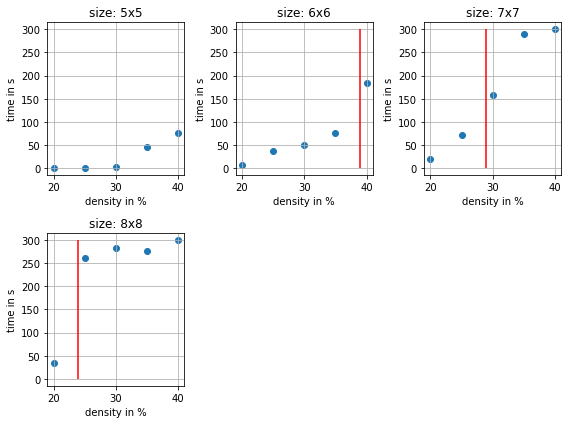

In [6]:
plotDensity(mean, nanList)

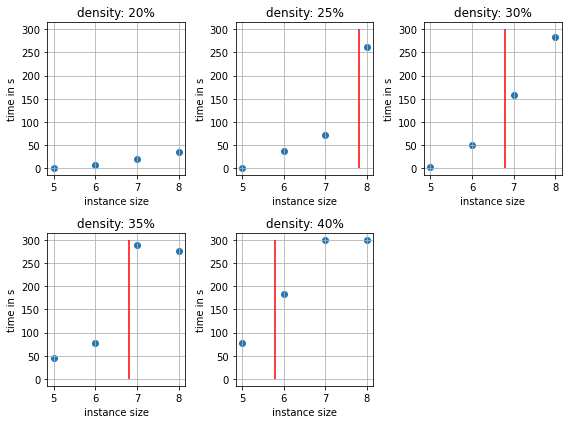

In [7]:
plotSize(mean, nanList)

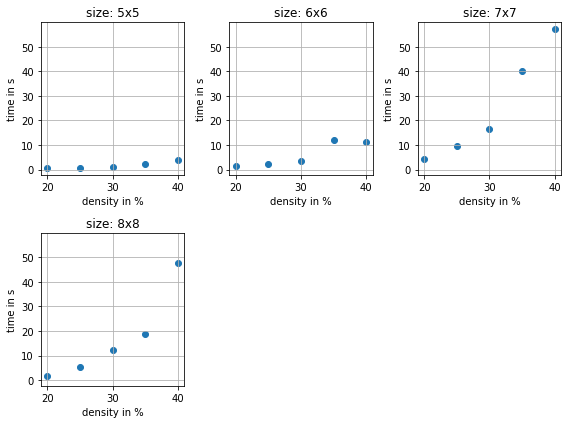

In [8]:
plotDensity(greedyMean, greedyNanList)

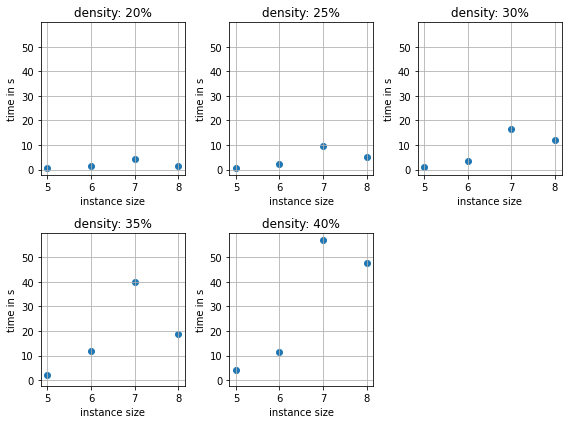

In [9]:
plotSize(greedyMean, greedyNanList)

In [74]:
def compareBar(cl1, cl2, category):
    points = [*range(1,11)]

    for i in range(len(cl1)):

        fig = plt.figure()

        ax = fig.add_subplot(2, 2, 1)

        ax.bar(points, list(cl2[i][category]), color="red")
        ax.bar(points, list(cl1[i][category]), color="blue")
        
        ax.set_xlabel('example number')
        ax.set_ylabel(category)
        ax.set_title('size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax.grid()

        plt.show()
        
def compareScatterTime(cl1, cl2, category):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)

        ax1.scatter(list(catList[i][category]), list(cl1[i]['time']))
        ax2.scatter(list(greedyCatList[i][category]), list(cl2[i]['time']))
        
        ax1.set_xlabel(category)
        ax1.set_ylabel('time')
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category)
        ax2.set_ylabel('time')
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()
        
def compareScatter(cl1, cl2, category1, category2):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)

        ax1.scatter(list(catList[i][category1]), list(cl1[i][category2]))
        ax2.scatter(list(greedyCatList[i][category1]), list(cl2[i][category2]))
        
        ax1.set_xlabel(category1)
        ax1.set_ylabel(category2)
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category1)
        ax2.set_ylabel(category2)
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()
        
def compareScatterTimeExp(cl1, cl2, category):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        
        # [x, y]
        data = np.array([list(cl1[i][category]), list(cl1[i]['time'])])
        # data sorted by pathlength (x values)
        data = data[:, np.argsort( data[0] ) ]
        
        # remove NaN values
        new_data = []
        for arr in data:
            newrow = arr[~np.isnan(arr)]
            new_data.append(list(newrow))
        
        ax1.scatter(new_data[0], new_data[1])
        
        if(len(new_data[0])>2):
            # log plot cbs
            ylog_data = np.log(new_data[1]) 
            curve_fit = np.polyfit(new_data[0], ylog_data, 1)
            y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_data[0]))
            
            ax1.plot(new_data[0], y, c='orange')

            # lin plot cbs
            curve_fit = np.polyfit(new_data[0], new_data[1], 1)
            y = curve_fit[1] + (curve_fit[0]*np.array(new_data[0]))

            ax1.plot(new_data[0], y, c='black')

        dataG = np.array([list(cl2[i][category]), list(cl2[i]['time'])])
        dataG = dataG[:, np.argsort( dataG[0] ) ]

        new_dataG = []
        for arr in dataG:
            newrow = arr[~np.isnan(arr)]
            new_dataG.append(list(newrow))
        
        ax2.scatter(new_dataG[0], new_dataG[1])
        
        if(len(new_dataG[0])>2):
            # log plot greedy
            ylog_data = np.log(new_dataG[1]) 
            curve_fit = np.polyfit(new_dataG[0], ylog_data, 1)
            y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_dataG[0]))

            ax2.plot(dataG[0], y, c='orange')

            # lin plot greedy
            curve_fit = np.polyfit(new_dataG[0], new_dataG[1], 1)
            y = curve_fit[1] + (curve_fit[0]*np.array(new_dataG[0]))

            ax2.plot(new_dataG[0], y, c='black')
        
        # labels
        ax1.set_xlabel(category)
        ax1.set_ylabel('time')
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category)
        ax2.set_ylabel('time')
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()
        
def compareScatterExp(cl1, cl2, category1, category2):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        
        # [x, y]
        data = np.array([list(cl1[i][category1]), list(cl1[i][category2])])
        # data sorted by pathlength (x values)
        data = data[:, np.argsort( data[0] ) ]
        
        # remove NaN values
        new_data = []
        for arr in data:
            newrow = arr[~np.isnan(arr)]
            new_data.append(list(newrow))
        
        ax1.scatter(new_data[0], new_data[1])
        
        if(len(new_data[0])>2):
            # log plot cbs
            ylog_data = np.log(new_data[1]) 
            curve_fit = np.polyfit(new_data[0], ylog_data, 1)
            y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_data[0]))
            
            ax1.plot(new_data[0], y, c='orange')

            # lin plot cbs
            curve_fit = np.polyfit(new_data[0], new_data[1], 1)
            y = curve_fit[1] + (curve_fit[0]*np.array(new_data[0]))

            ax1.plot(new_data[0], y, c='black')

        dataG = np.array([list(cl2[i][category1]), list(cl2[i][category2])])
        dataG = dataG[:, np.argsort( dataG[0] ) ]

        new_dataG = []
        for arr in dataG:
            newrow = arr[~np.isnan(arr)]
            new_dataG.append(list(newrow))
        
        ax2.scatter(new_dataG[0], new_dataG[1])
        
        if(len(new_dataG[0])>2):
            # log plot greedy
            ylog_data = np.log(new_dataG[1]) 
            curve_fit = np.polyfit(new_dataG[0], ylog_data, 1)
            y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_dataG[0]))

            ax2.plot(dataG[0], y, c='orange')

            # lin plot greedy
            curve_fit = np.polyfit(new_dataG[0], new_dataG[1], 1)
            y = curve_fit[1] + (curve_fit[0]*np.array(new_dataG[0]))

            ax2.plot(new_dataG[0], y, c='black')
        
        # labels
        ax1.set_xlabel(category1)
        ax1.set_ylabel(category2)
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category1)
        ax2.set_ylabel(category2)
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()

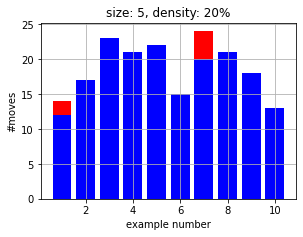

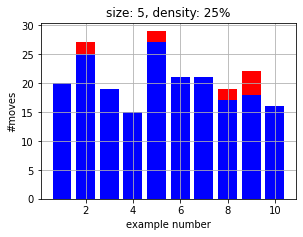

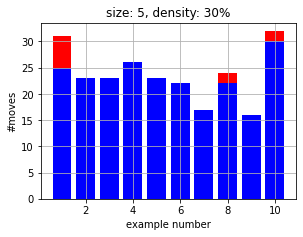

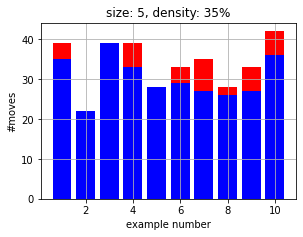

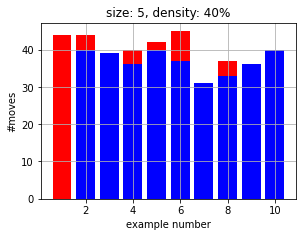

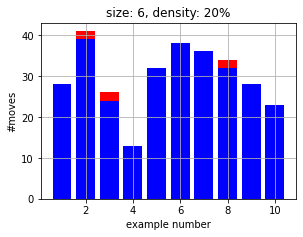

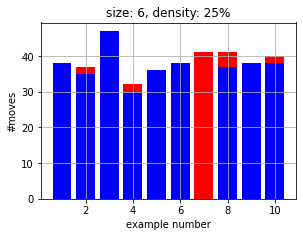

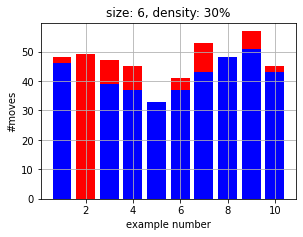

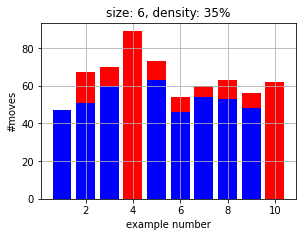

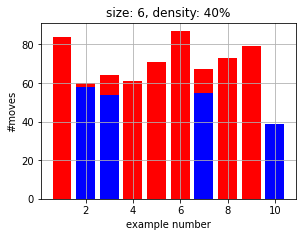

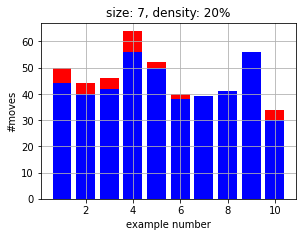

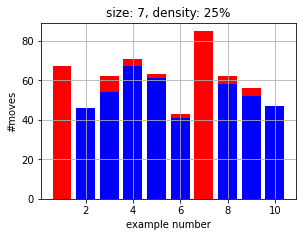

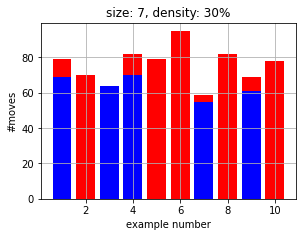

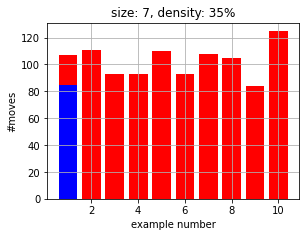

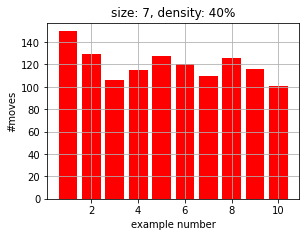

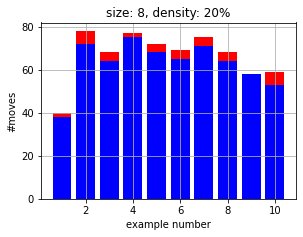

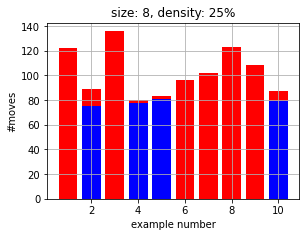

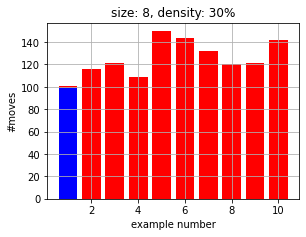

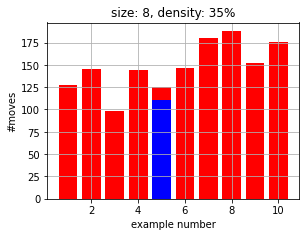

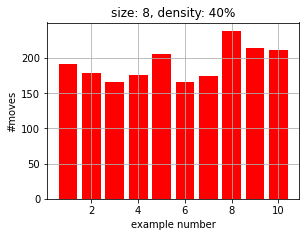

In [10]:
compareBar(catList, greedyCatList, '#moves')

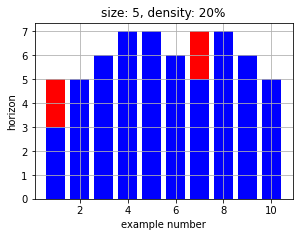

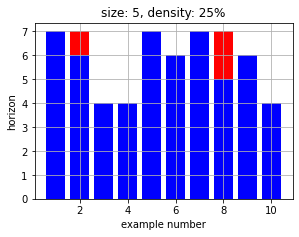

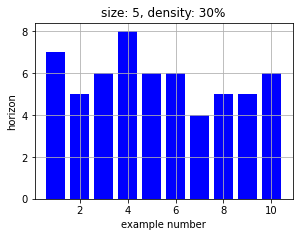

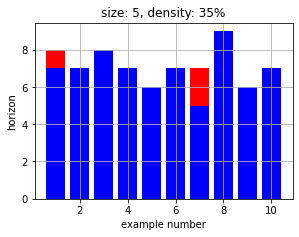

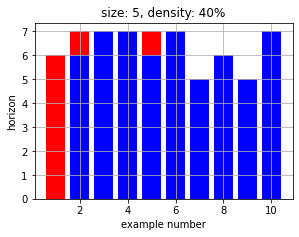

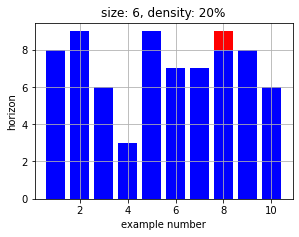

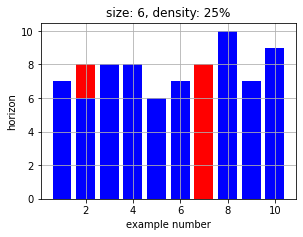

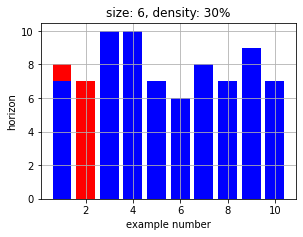

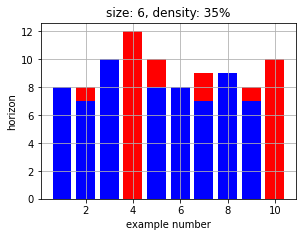

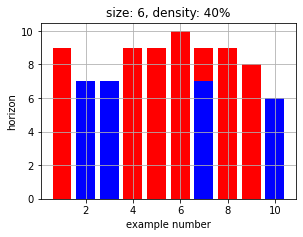

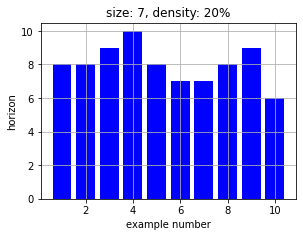

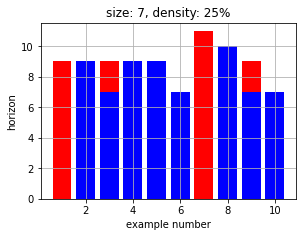

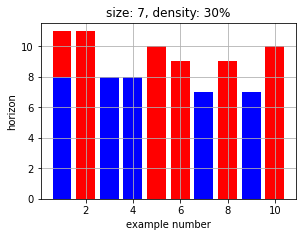

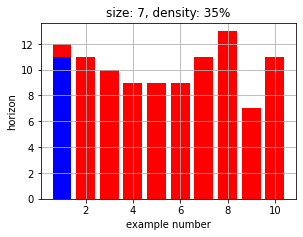

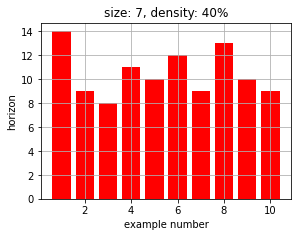

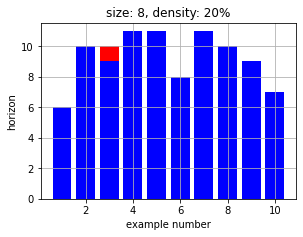

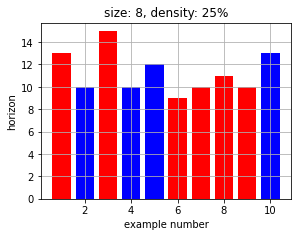

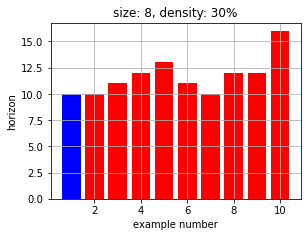

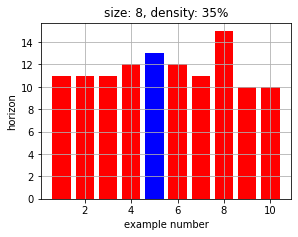

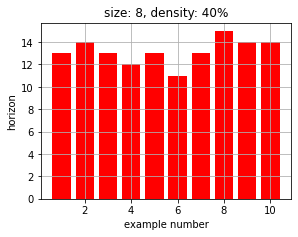

In [11]:
compareBar(catList, greedyCatList, 'horizon')

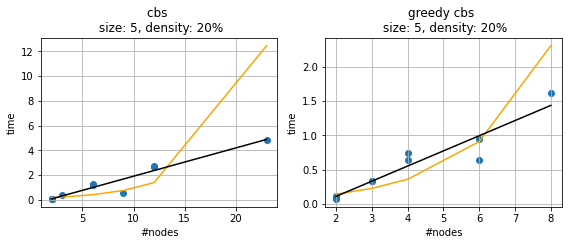

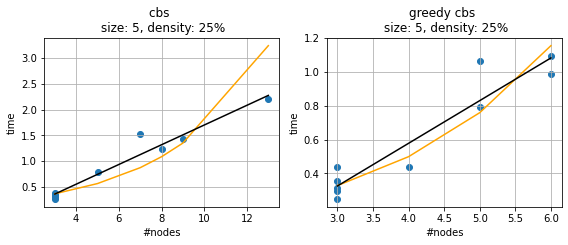

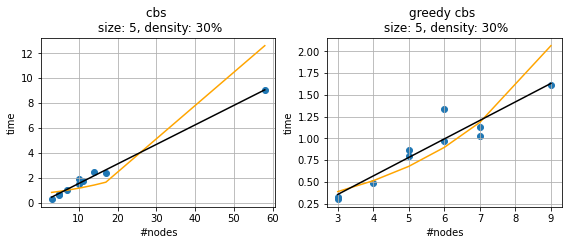

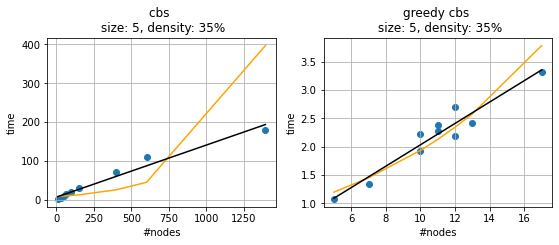

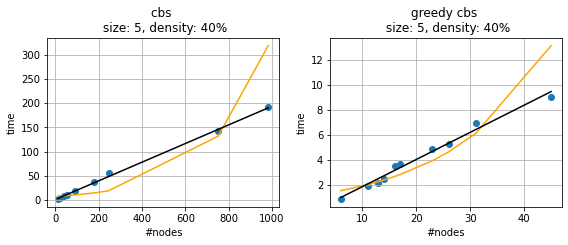

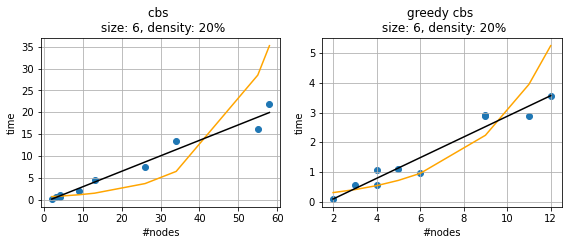

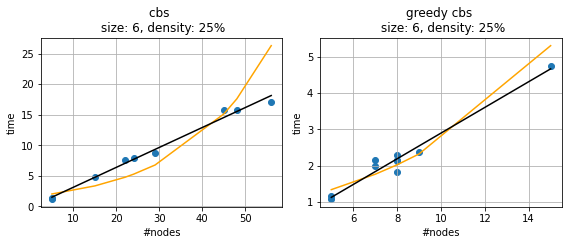

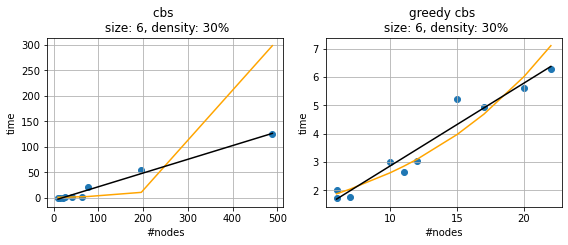

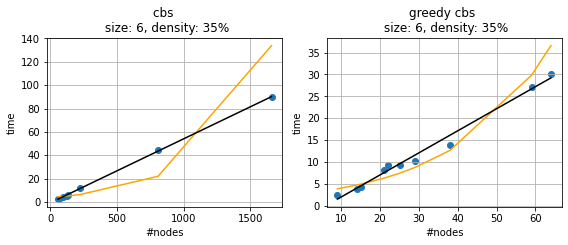

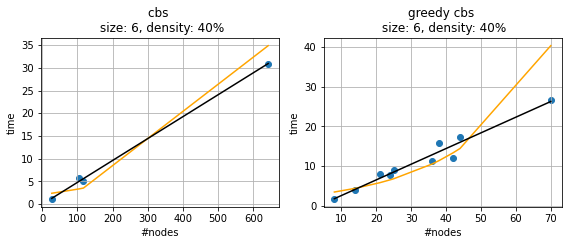

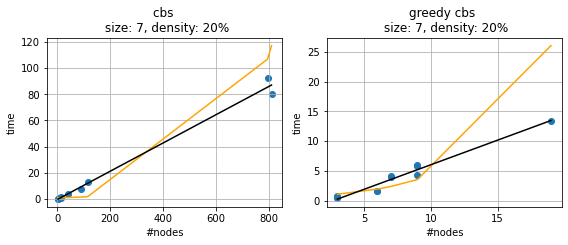

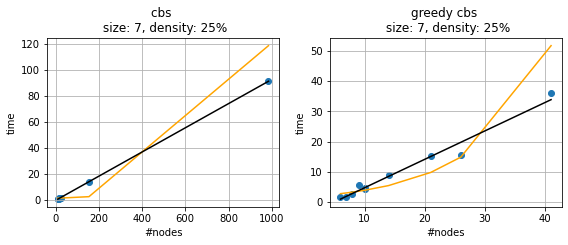

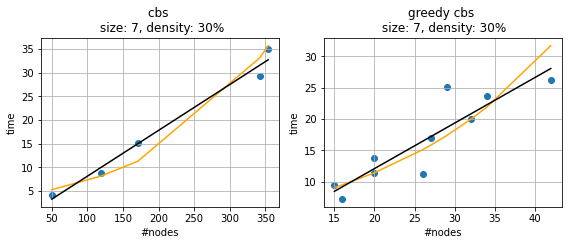

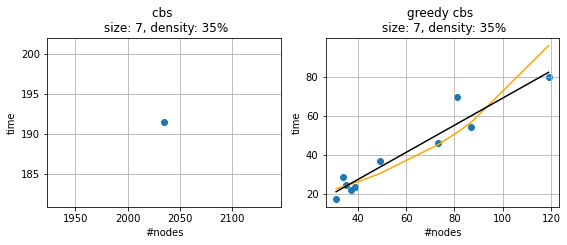

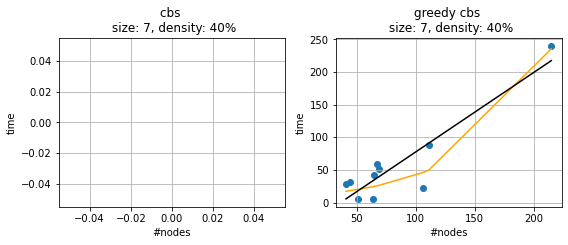

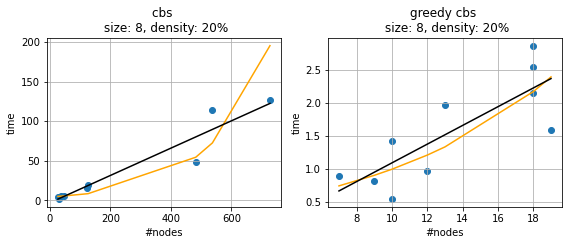

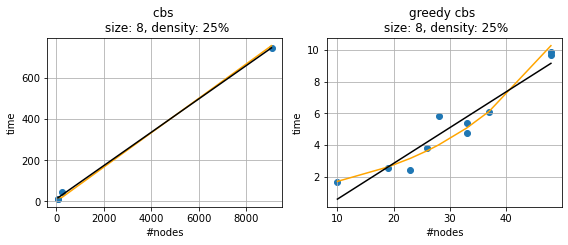

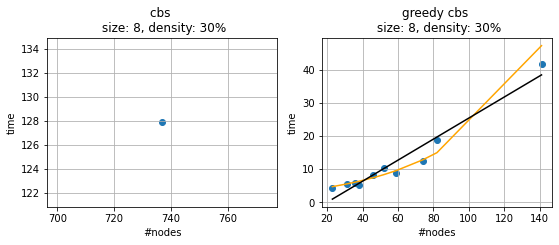

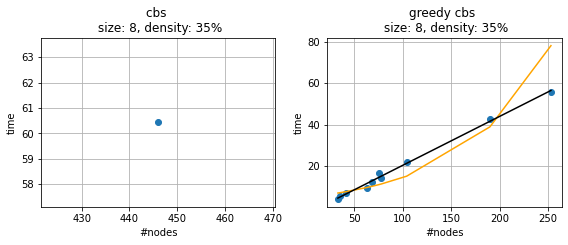

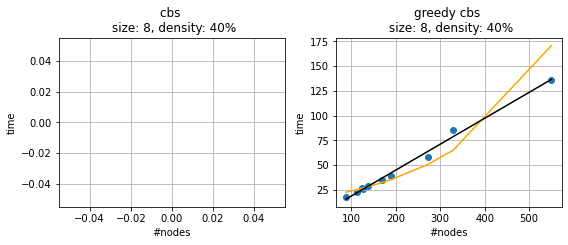

In [63]:
compareScatterTimeExp(catList, greedyCatList, '#nodes')

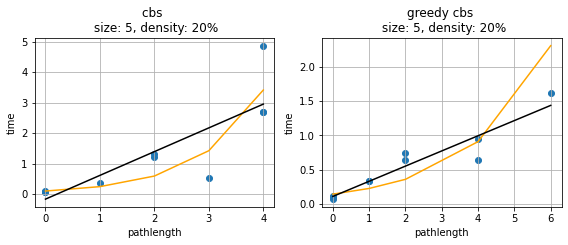

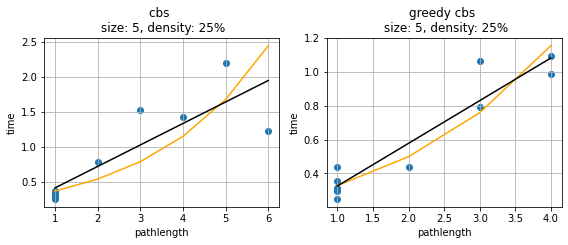

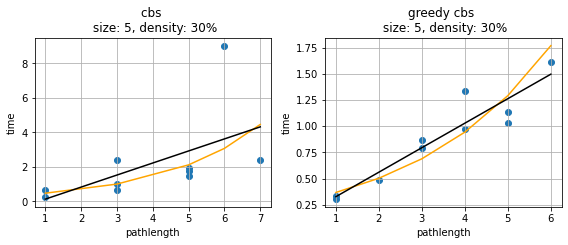

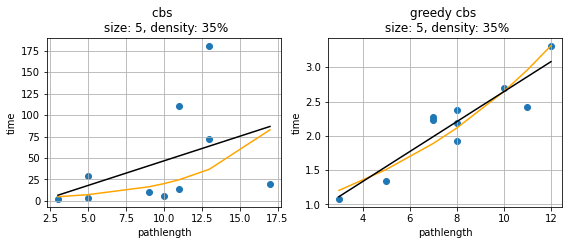

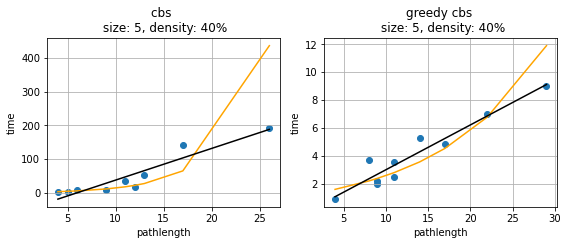

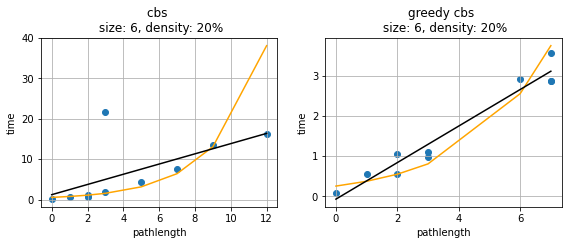

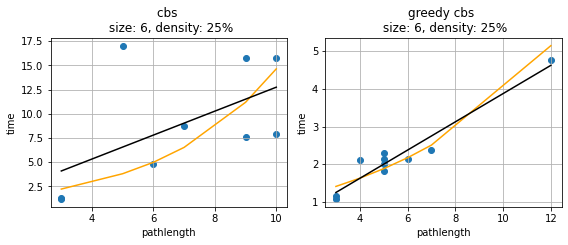

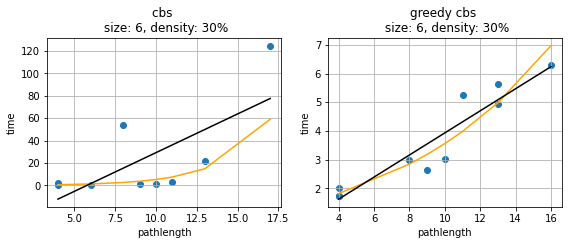

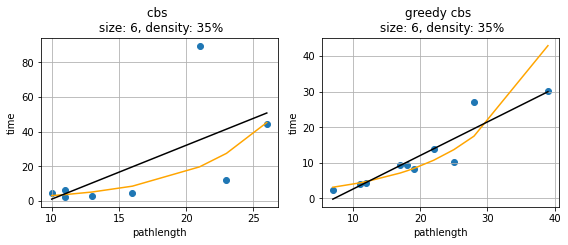

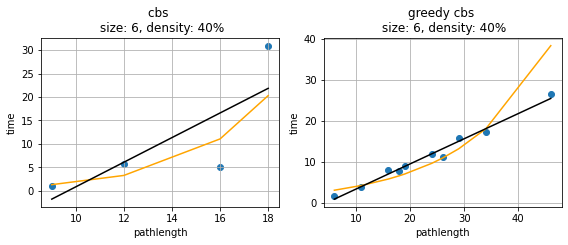

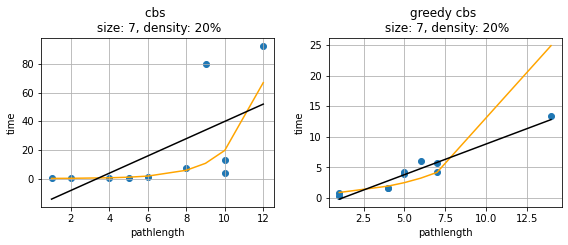

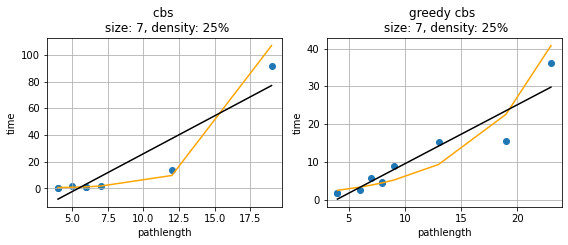

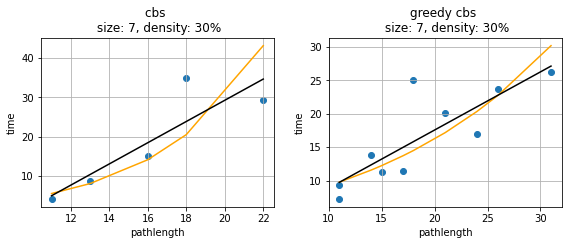

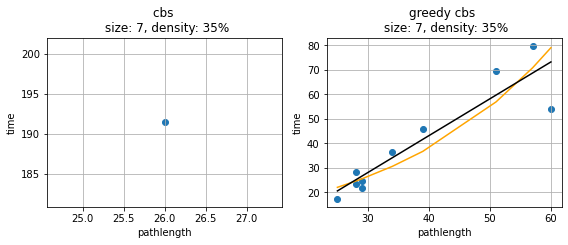

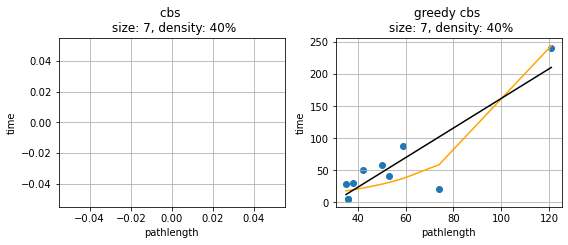

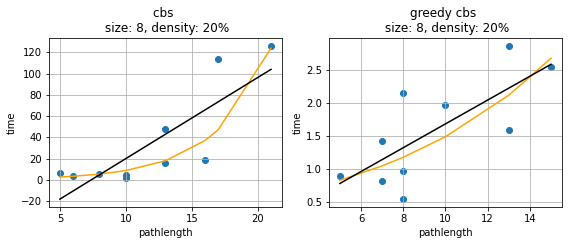

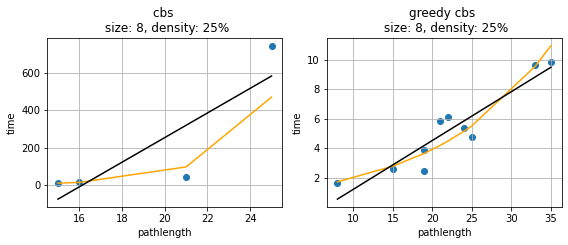

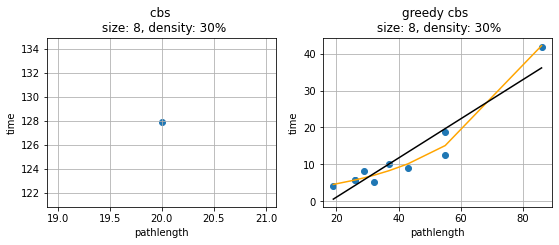

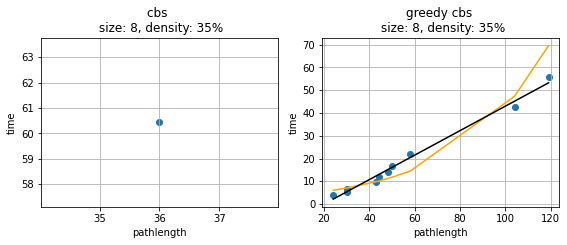

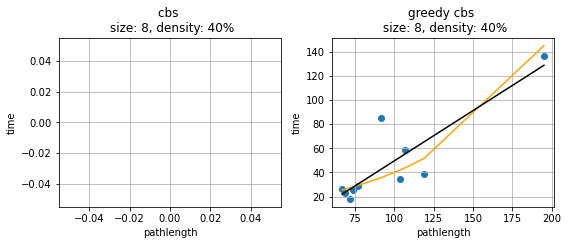

In [62]:
compareScatterTimeExp(catList, greedyCatList, 'pathlength')
#Besonders in interessant! ng logorithmisch, g linear?

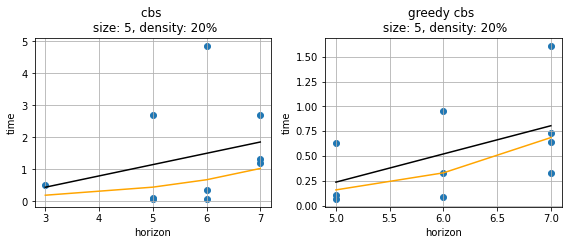

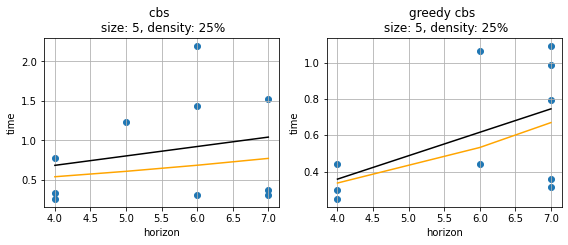

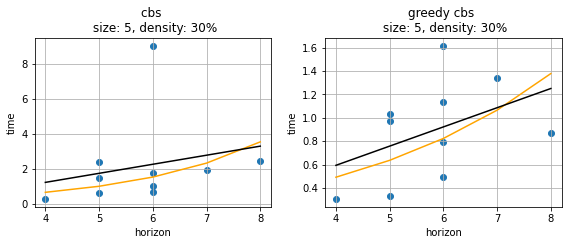

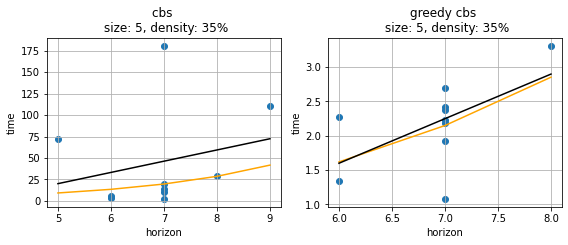

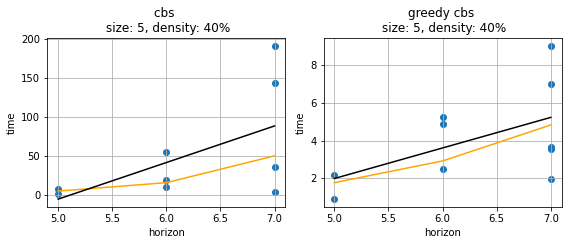

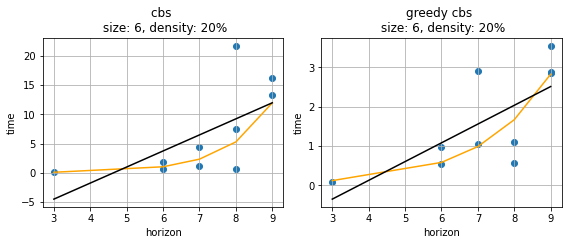

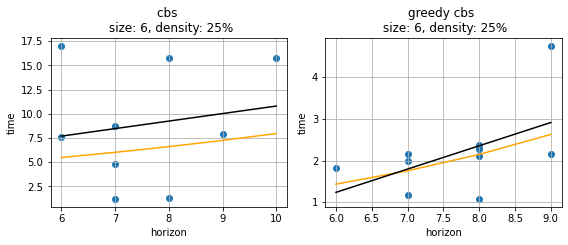

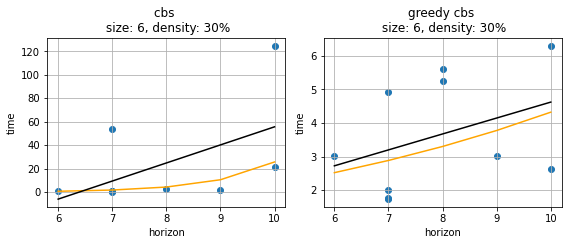

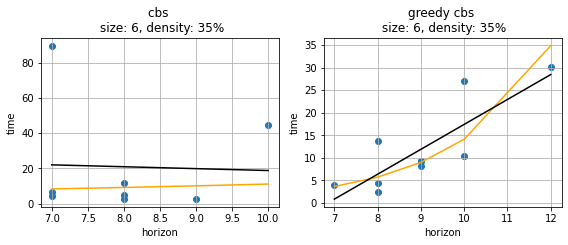

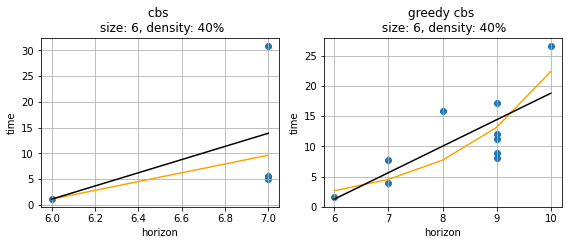

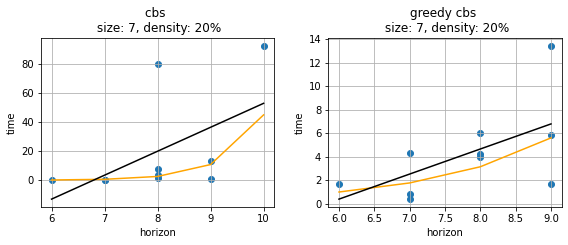

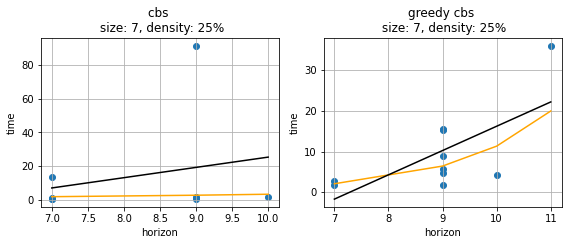

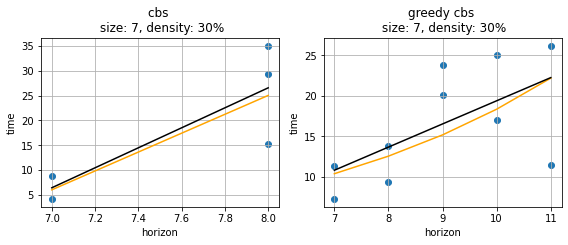

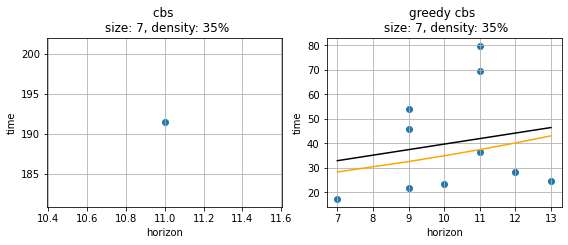

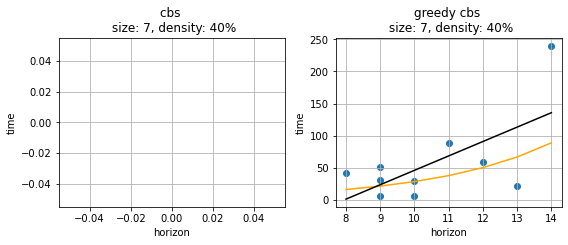

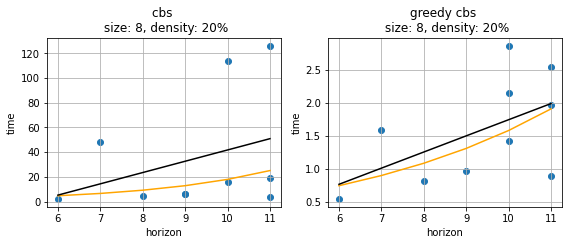

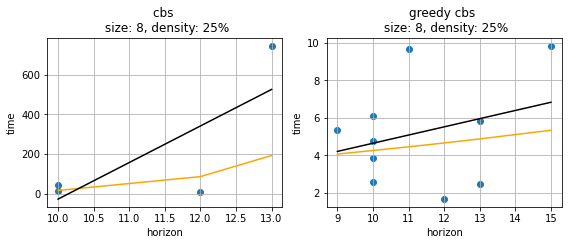

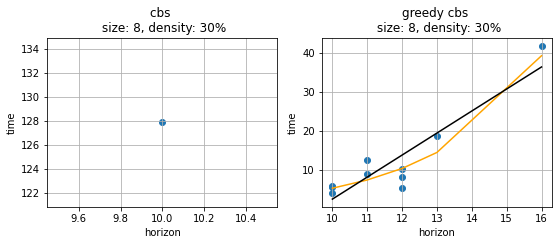

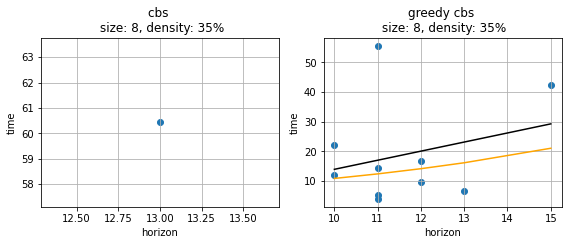

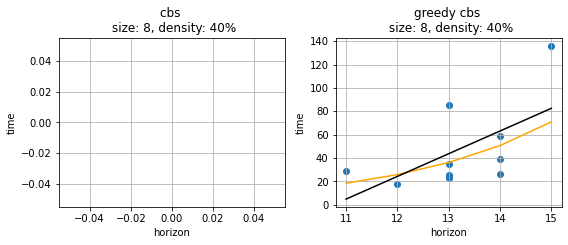

In [64]:
compareScatterTimeExp(catList, greedyCatList, 'horizon')

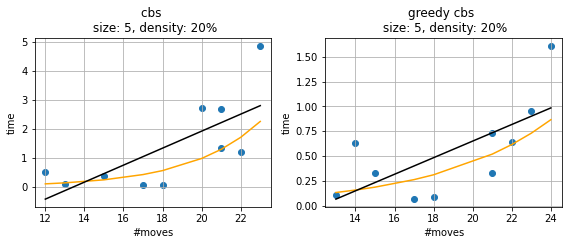

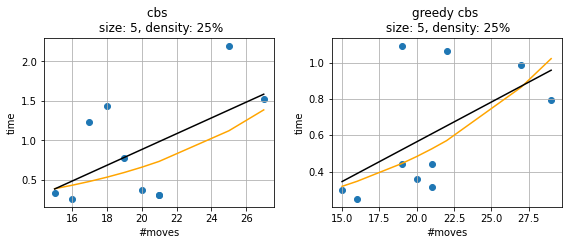

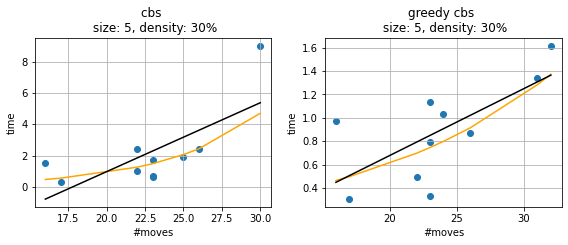

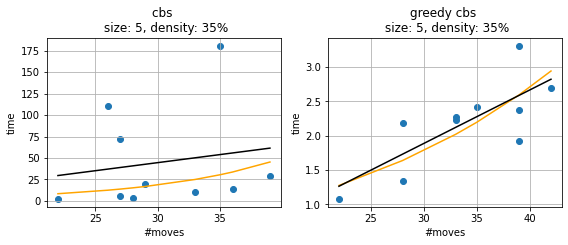

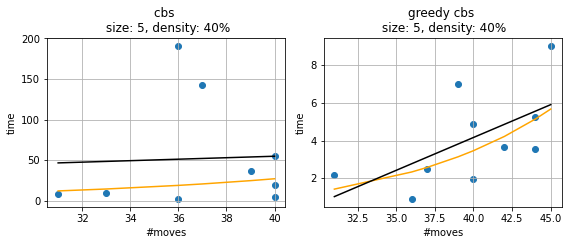

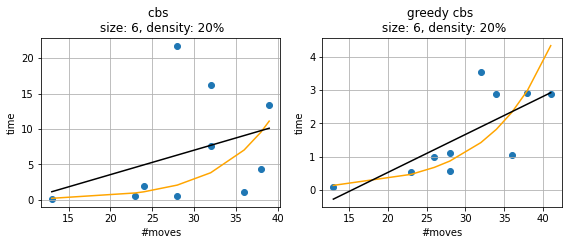

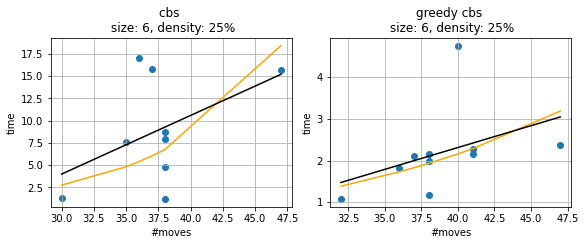

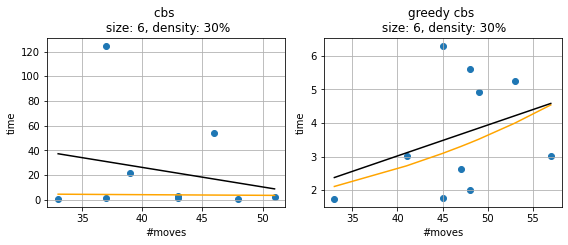

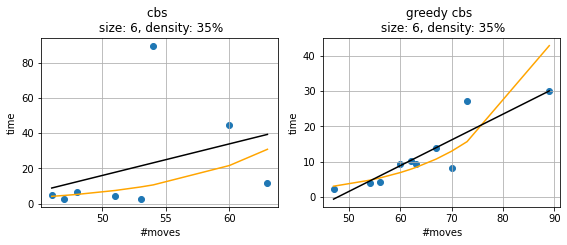

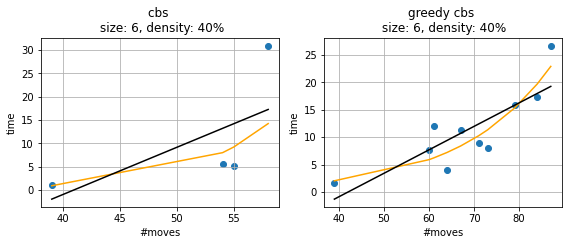

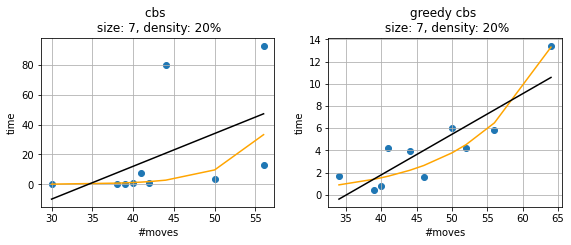

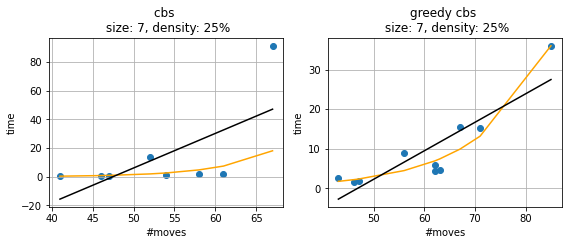

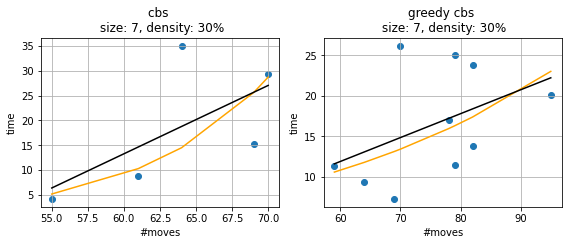

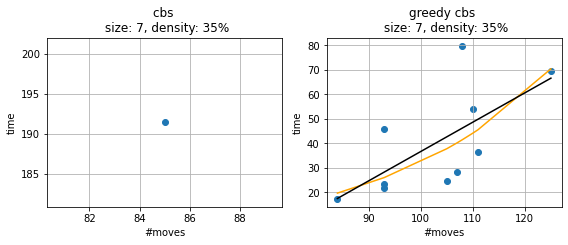

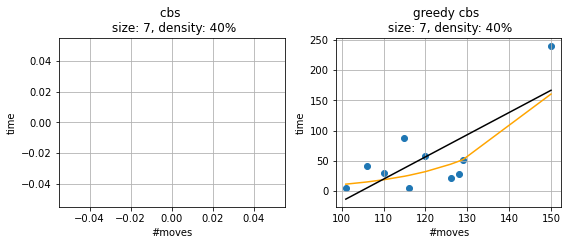

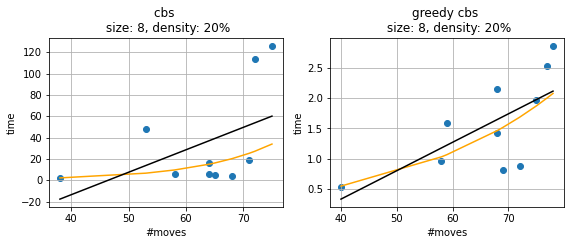

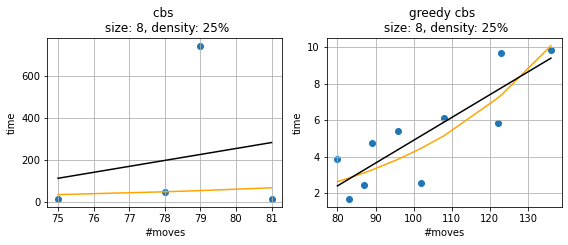

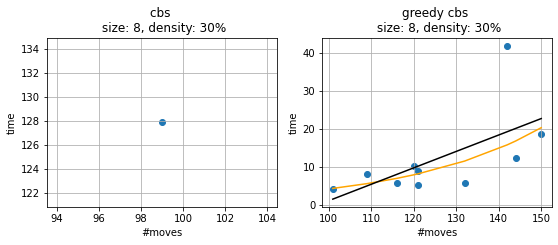

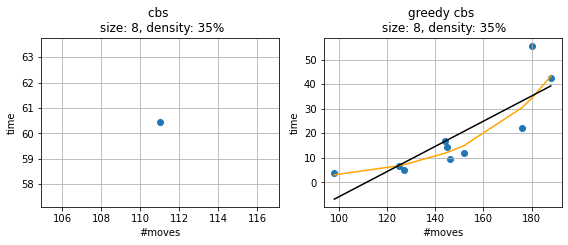

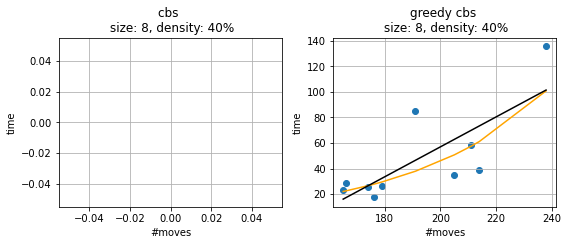

In [65]:
compareScatterTimeExp(catList, greedyCatList, '#moves')

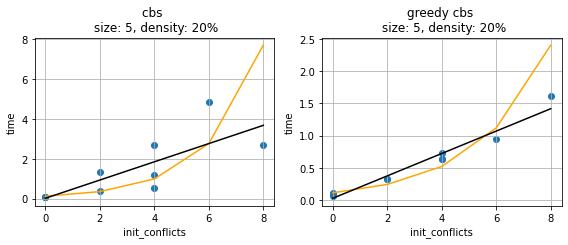

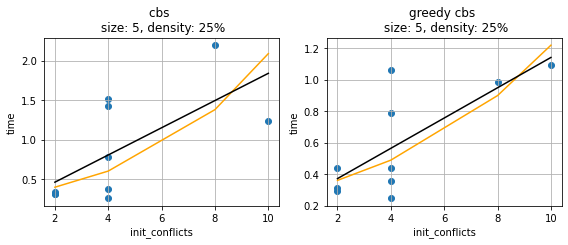

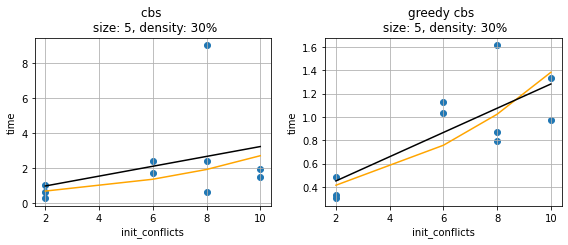

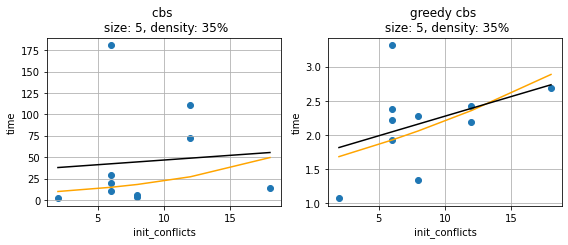

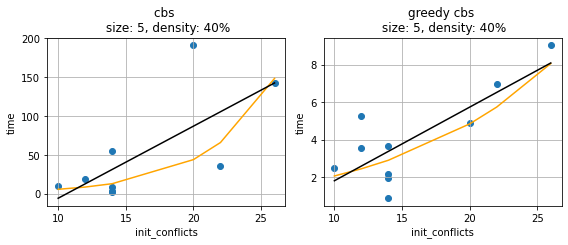

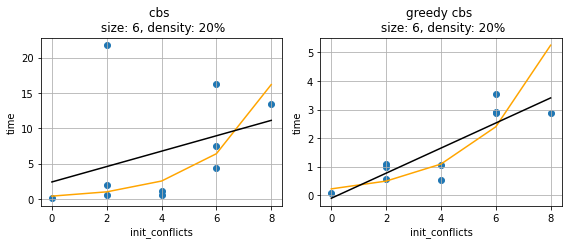

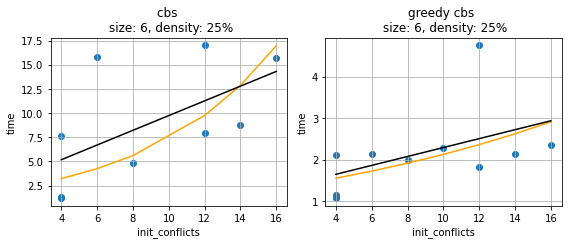

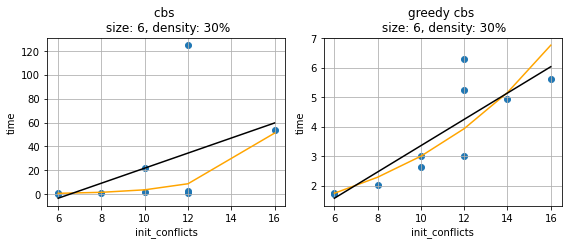

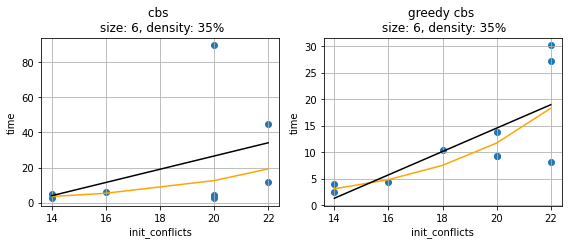

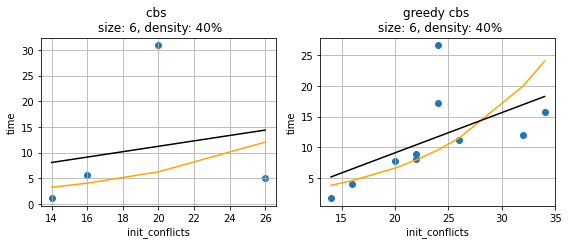

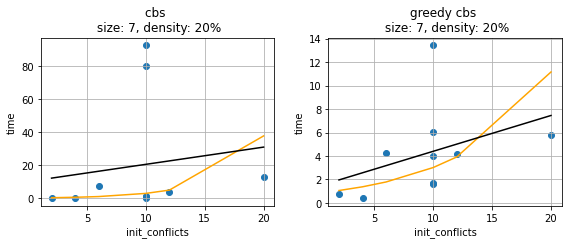

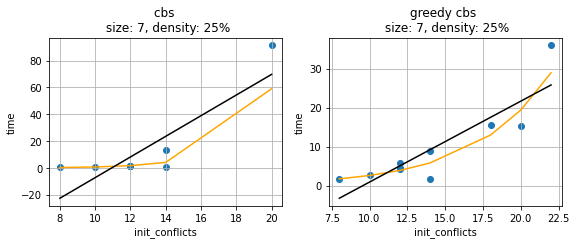

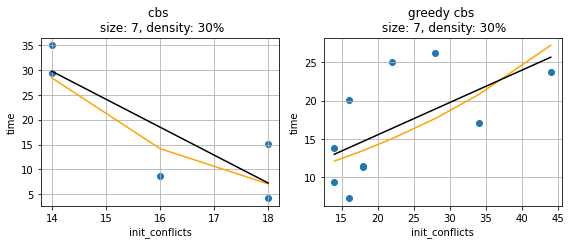

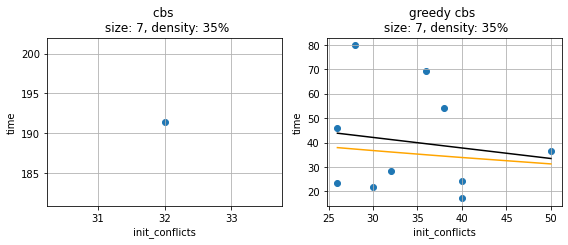

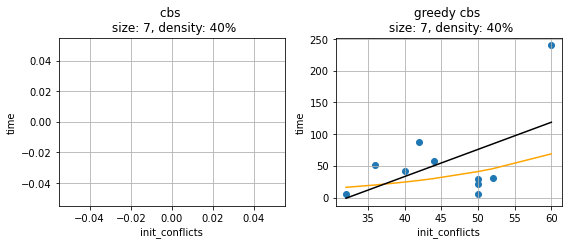

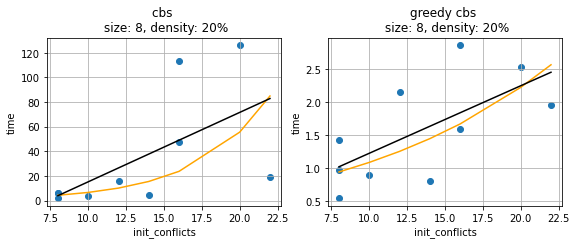

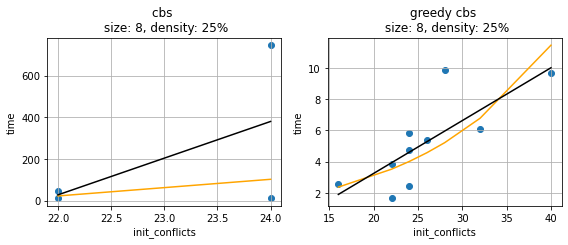

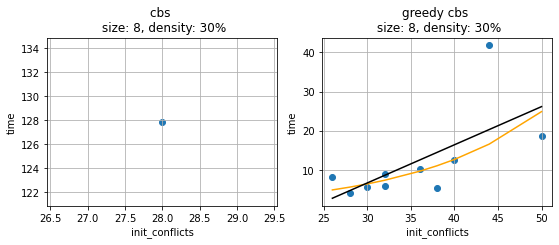

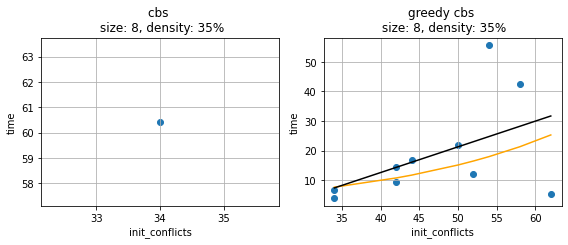

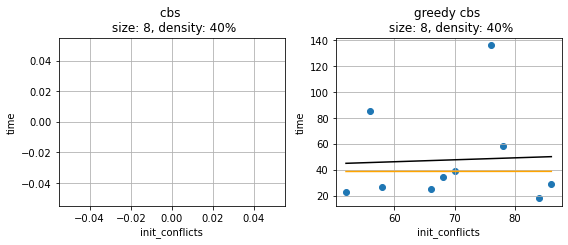

In [67]:
compareScatterTimeExp(catList, greedyCatList, 'init_conflicts')
# ist hier non-greedy cbs exponentiell?

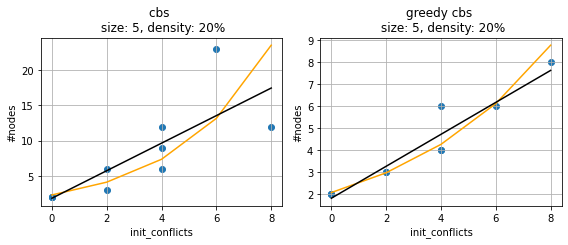

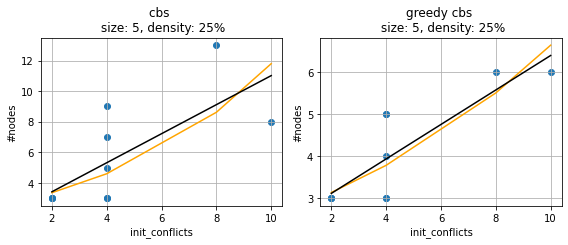

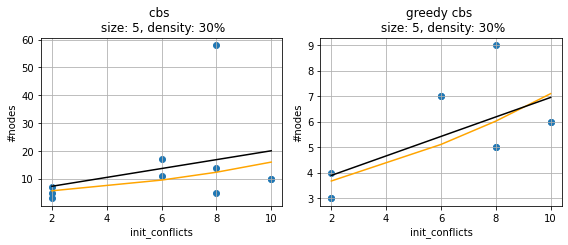

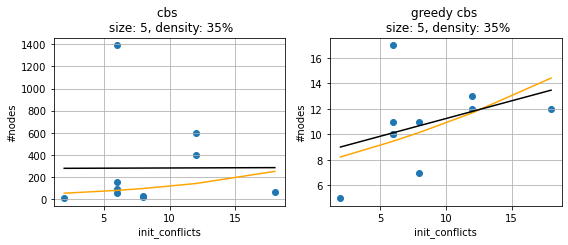

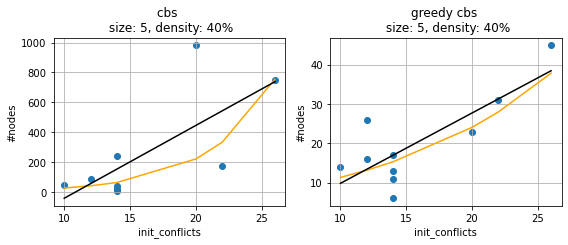

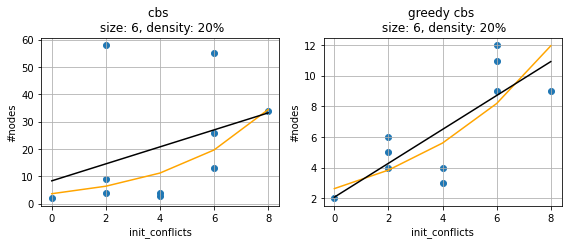

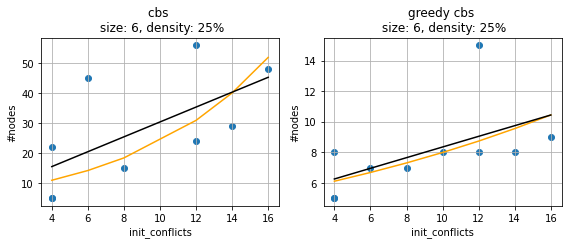

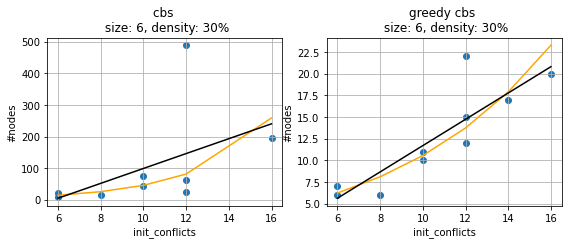

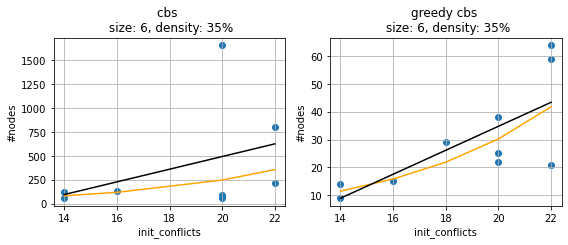

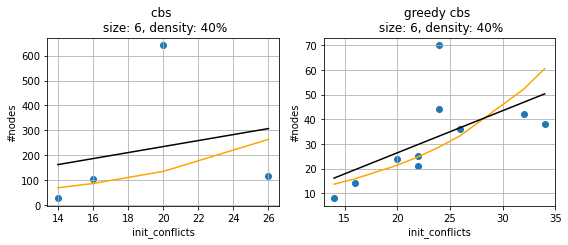

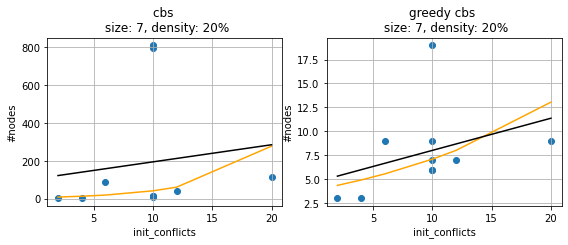

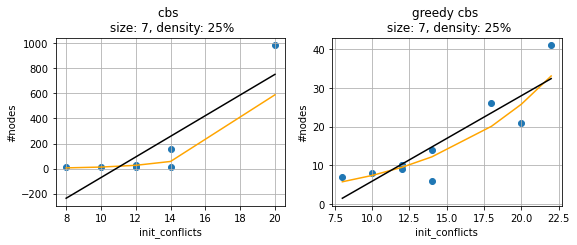

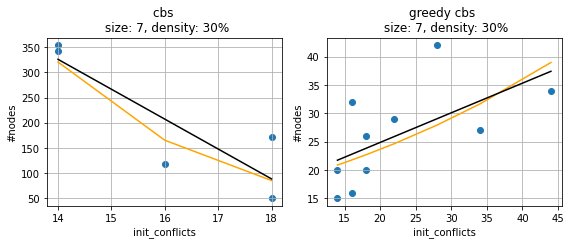

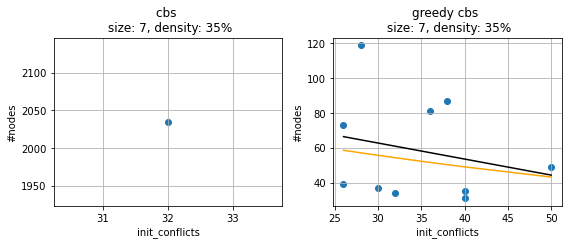

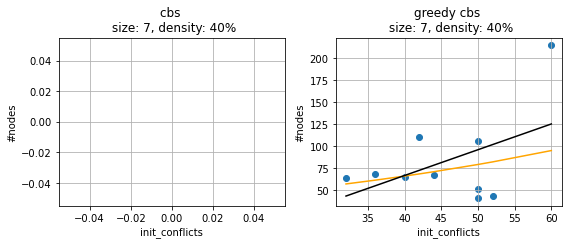

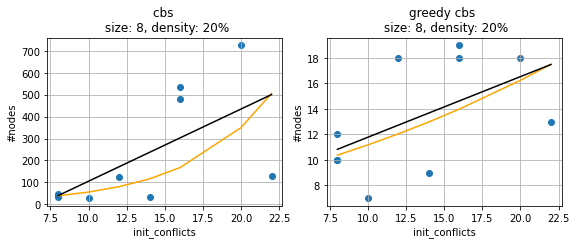

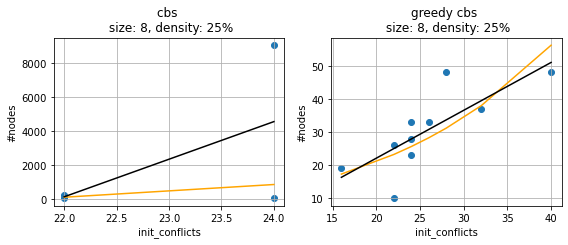

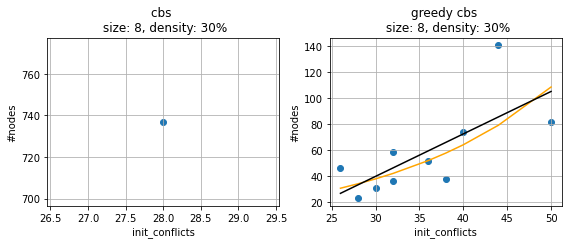

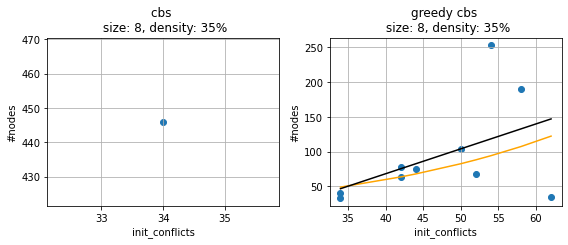

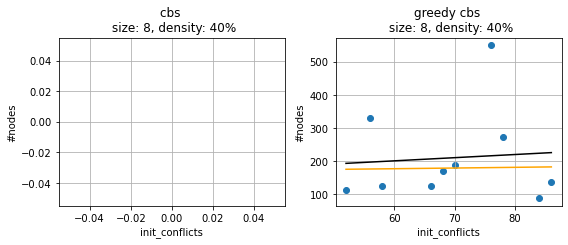

In [75]:
compareScatterExp(catList, greedyCatList, 'init_conflicts', '#nodes')

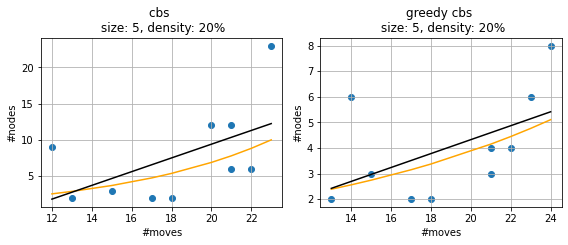

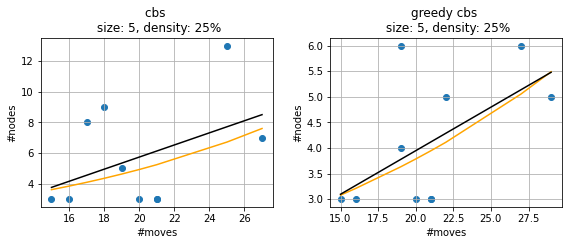

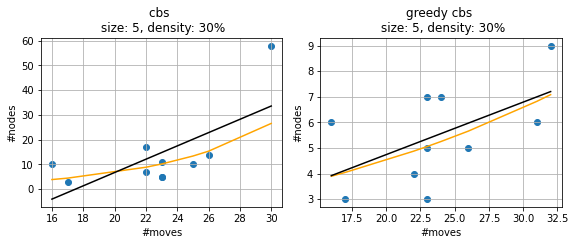

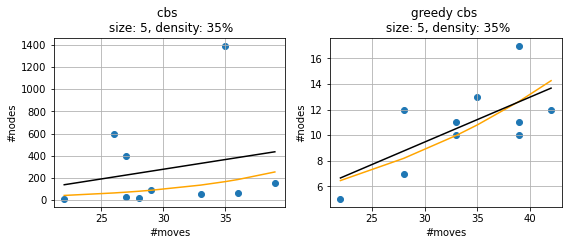

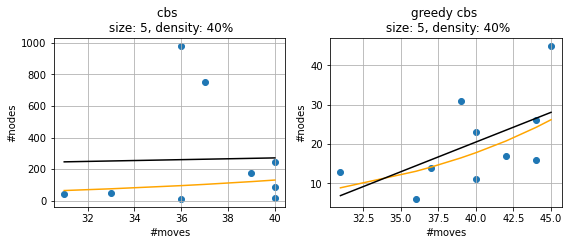

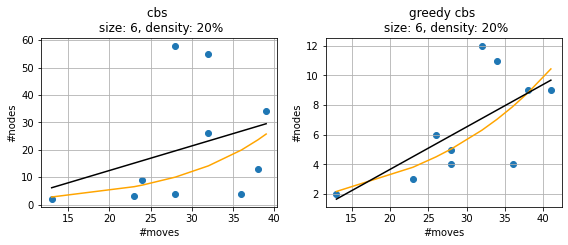

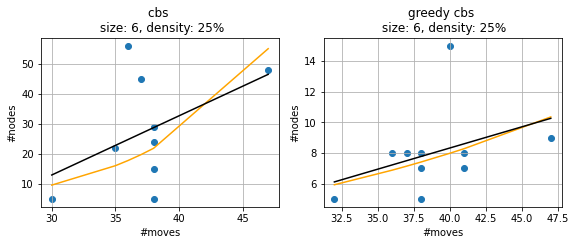

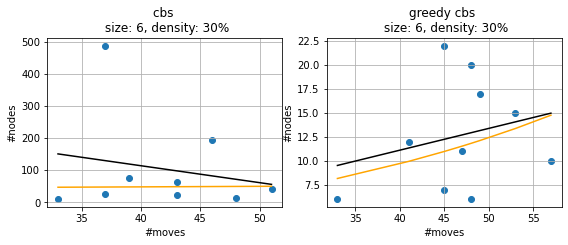

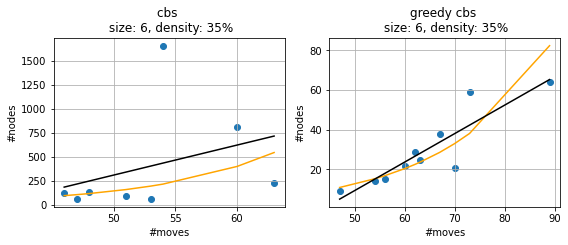

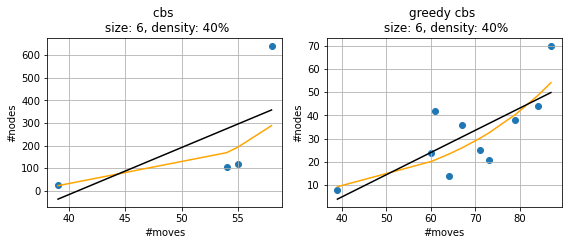

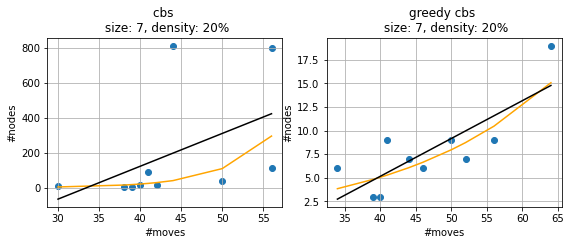

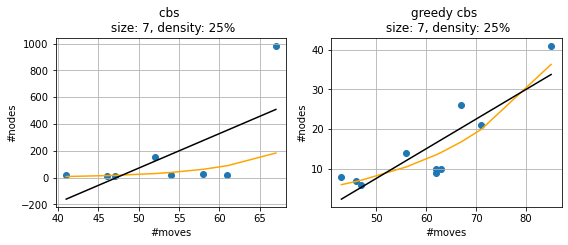

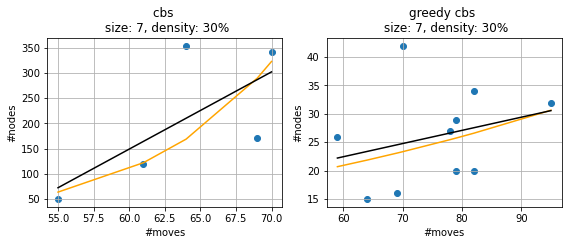

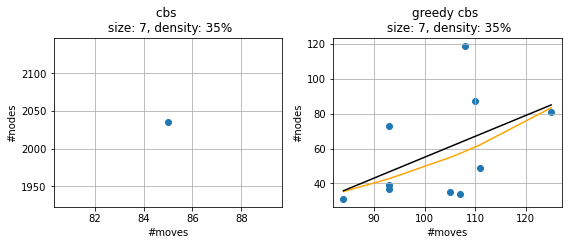

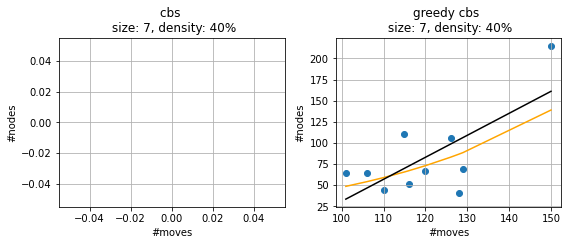

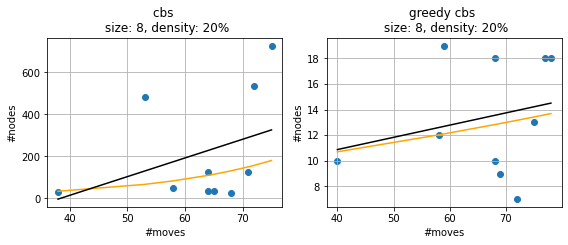

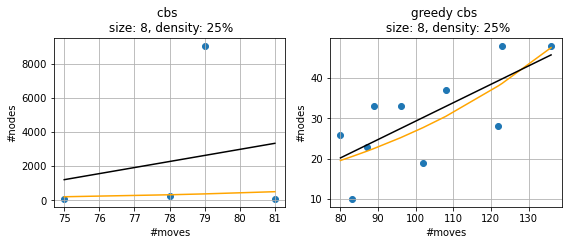

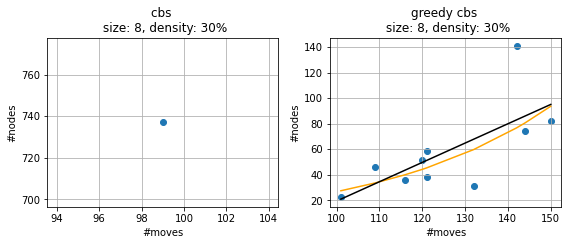

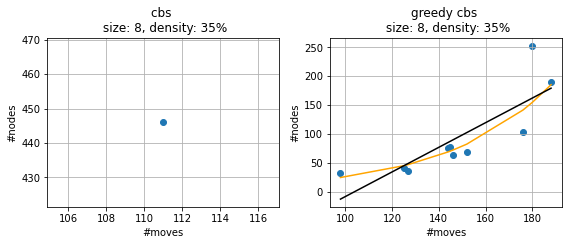

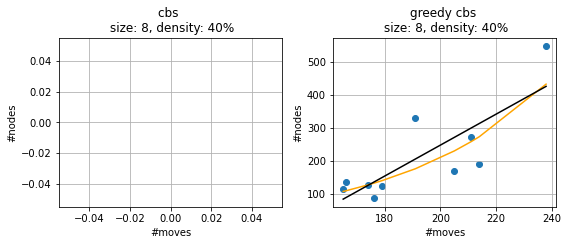

In [76]:
compareScatterExp(catList, greedyCatList, '#moves', '#nodes')

In [ ]:
plotDensityNan(nanList)

In [ ]:
plotSizeNan(nanList)

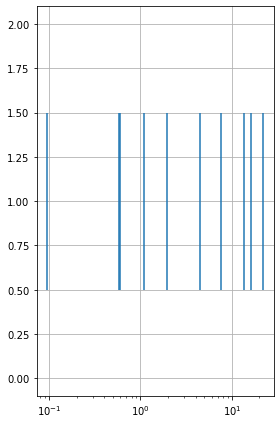

In [79]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

plt.xscale('log')

ax1.eventplot(list(catList[5]['time']))

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()

plt.show()

In [98]:
inc_cbs1 = pd.read_csv("inc_benchmarkResults/cbs1.csv")
inc_cbs2 = pd.read_csv("inc_benchmarkResults/cbs2.csv")
inc_cbs3 = pd.read_csv("inc_benchmarkResults/cbs3.csv")

inc_greedy1 = pd.read_csv("inc_benchmarkResults/greedyUpTo35robs1.csv")
inc_greedy2 = pd.read_csv("inc_benchmarkResults/greedyUpTo35robs2.csv")
inc_greedy3 = pd.read_csv("inc_benchmarkResults/greedyUpTo35robs3.csv")

In [104]:
def num(row):
    try:
        int(row['time'])
        print(row['time'])
        return int(str(row["file"]).split("/")[-1].split("r")[0])
    except: 
        return np.nan

inc_cbs1['num'] = inc_cbs1.apply(lambda row: num(row), axis=1)
inc_cbs2['num'] = inc_cbs2.apply(lambda row: num(row), axis=1)
inc_cbs3['num'] = inc_cbs3.apply(lambda row: num(row), axis=1)

inc_greedy1['num'] = inc_greedy1.apply(lambda row: num(row), axis=1)
inc_greedy2['num'] = inc_greedy2.apply(lambda row: num(row), axis=1)
inc_greedy3['num'] = inc_greedy3.apply(lambda row: num(row), axis=1)

inc_cbs1

1.0443927009910112
2.8333717639907263
13.476744833998964
14.56273186900944
13.536090458001127
37.98385761800455
111.01915403100428
138.1756863619958
0.011830868999822995
0.010239251001621595
0.010919595006271264
0.012387452996335924
0.0106839240033878
0.0146940819977317
0.2747479989920976
0.45313185198756395
0.4236747909890255
0.7981206850090531
1.477454646999831
4.7363408009987324
4.867026114006876
13.269280645006802
43.60238188700168
165.30740046000574
0.01263160399685148
0.08549247699556872
0.14205676899291575
0.10558250000758562
0.20217288700223435
0.2665219679911388
0.7638683599943761
0.2792972060124157
8.436924549998366
2.9364924609981244
78.31826000499132
163.44211495100168
237.7589340319973
0.013992257998324929
0.01570941400132142
0.29582143398874905
0.1848957439942751
0.1950500090024434
0.777432841990958
0.8624373630009359
0.7099378879938739
1.2809987240034388
1.580071223004779
2.8304863350058436
2.387354234000668
2.4738221599982357
5.041135079001833
7.1225215020022015
6.35516

,file,time,#nodes,pathlength,horizon,#moves,init_conflicts,num
0,inc_benchmarkResults/ex/ex1/10robs.lp,1.044393,21.0,6.0,8.0,46.0,8.0,10.0
1,inc_benchmarkResults/ex/ex1/11robs.lp,2.833372,45.0,12.0,8.0,49.0,12.0,11.0
2,inc_benchmarkResults/ex/ex1/12robs.lp,13.476745,192.0,9.0,8.0,50.0,12.0,12.0
3,inc_benchmarkResults/ex/ex1/13robs.lp,14.562732,218.0,12.0,9.0,59.0,14.0,13.0
4,inc_benchmarkResults/ex/ex1/14robs.lp,13.536090,196.0,19.0,9.0,67.0,18.0,14.0
5,inc_benchmarkResults/ex/ex1/15robs.lp,37.983858,480.0,23.0,9.0,74.0,18.0,15.0
6,inc_benchmarkResults/ex/ex1/16robs.lp,111.019154,1317.0,21.0,9.0,76.0,22.0,16.0
7,inc_benchmarkResults/ex/ex1/17robs.lp,138.175686,1616.0,19.0,9.0,78.0,22.0,17.0
8,inc_benchmarkResults/ex/ex1/18robs.lp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,inc_benchmarkResults/ex/ex1/19robs.lp,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
def plotIncLog(dataframe, category, firstConflictOccurence, size, mode):
    # [x, y]
    data = np.array([list(dataframe['num']), list(dataframe[category])])
    # data sorted by pathlength (x values)
    data = data[:, np.argsort( data[0] ) ]
      
    # remove NaN values
    new_data = []
    for arr in data:
        newrow = arr[~np.isnan(arr)]
        new_data.append(list(newrow))
        
    print(new_data)
        
    ax1.scatter(new_data[0], new_data[1])
        
    # log plot cbs
    ylog_data = np.log(new_data[1]) 
    curve_fit = np.polyfit(new_data[0], ylog_data, 1)
    y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_data[0]))
    
    dataframe.plot(x="num", y=category, label="solving speed when num of robots gradually increased", kind="scatter")
    plt.vlines(firstConflictOccurence + 0.5, 10^(-2), size, label="first conflict occurs", color="red")        
    plt.plot(new_data[0], y, c='orange')
    x = 0
    for i in dataframe['time'].isna():
        if(i):
            plt.scatter(dataframe['num'][x], [300], color = 'red')
        x+=1
    plt.legend()
    plt.show()
    
def plotInc(dataframe, category, firstConflictOccurence, size, mode):
    dataframe.plot(x="num", y=category, label="initial conflicts when num of robots gradually increased", kind="scatter", ylim=(-2, size), xlim=(1,mode))
    plt.legend()
    plt.show()

[[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0], [0.011830868999822995, 0.010239251001621595, 0.010919595006271264, 0.012387452996335924, 0.0106839240033878, 0.0146940819977317, 0.2747479989920976, 0.45313185198756395, 1.0443927009910112, 2.8333717639907263, 13.476744833998964, 14.56273186900944, 13.536090458001127, 37.98385761800455, 111.01915403100428, 138.1756863619958]]


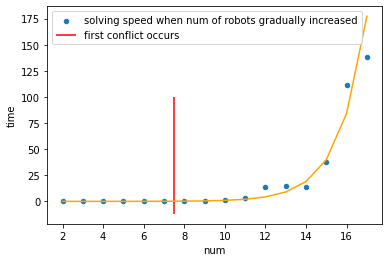

[[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0], [0.01263160399685148, 0.08549247699556872, 0.14205676899291575, 0.10558250000758562, 0.20217288700223435, 0.2665219679911388, 0.7638683599943761, 0.2792972060124157, 0.4236747909890255, 0.7981206850090531, 1.477454646999831, 4.7363408009987324, 4.867026114006876, 13.269280645006802, 43.60238188700168, 165.30740046000574]]


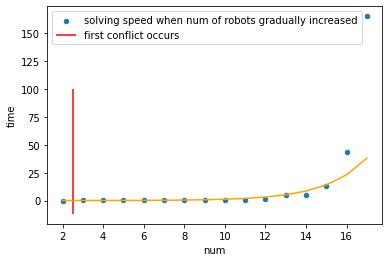

[[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0], [0.013992257998324929, 0.01570941400132142, 0.29582143398874905, 0.1848957439942751, 0.1950500090024434, 0.777432841990958, 0.8624373630009359, 0.7099378879938739, 8.436924549998366, 2.9364924609981244, 78.31826000499132, 163.44211495100168, 237.7589340319973]]


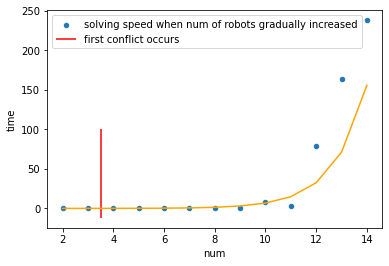

In [114]:
plotIncLog(inc_cbs1, 'time', 7, 200, 18)
plotIncLog(inc_cbs2, 'time', 2, 200, 18)
plotIncLog(inc_cbs3, 'time', 3, 200, 18)

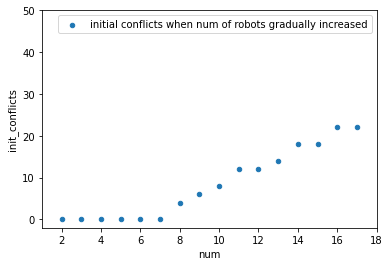

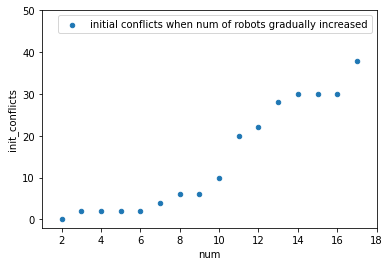

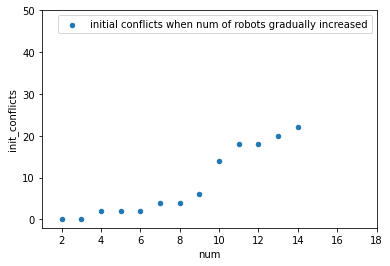

In [115]:
plotInc(inc_cbs1, 'init_conflicts', 7, 50, 18)
plotInc(inc_cbs2, 'init_conflicts', 2, 50, 18)
plotInc(inc_cbs3, 'init_conflicts', 3, 50, 18)

[[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 27.0, 28.0, 30.0, 31.0], [0.011499954001919832, 0.15909300500061366, 0.1373154210014036, 1.2058374059997732, 0.7560277879965724, 1.3687769769967415, 1.0316884839994598, 1.1048531859996729, 1.2809987240034388, 1.580071223004779, 2.8304863350058436, 2.387354234000668, 2.4738221599982357, 5.041135079001833, 7.1225215020022015, 6.3551686689970674, 10.30241450900212, 25.536418438998226, 73.63703768800042, 11.283519837998028, 38.94483901700004, 34.96446745399589, 55.587903922001715, 54.49542658199789, 72.66416001100151, 70.4223408120015, 244.83759183400247, 124.06177104800007]]


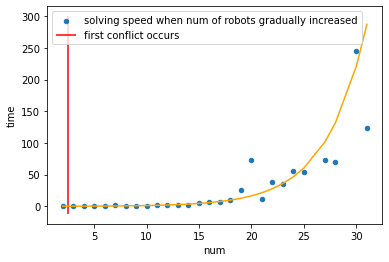

[[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 32.0], [0.012508865998825058, 0.009800216008443384, 0.009877534001134336, 0.2801903189974837, 0.5064351479959441, 1.010057710998808, 0.7448895720008295, 0.8731275699974503, 0.7523042730026646, 1.00533194799209, 1.405992101994343, 1.908465726010036, 1.905515603997628, 3.2372117889899528, 9.486288868996779, 5.67158040299546, 12.670018653996522, 53.41114866800489, 13.836371463010435, 12.5917830660037, 52.347891302997596, 20.899553925992226, 98.19718175899469, 64.67658874399785, 110.33109440999395, 84.32020319599543, 42.23706498100364, 168.26350746200478]]


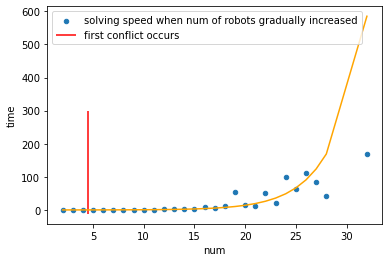

[[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 31.0, 33.0, 34.0], [0.011118005000753328, 0.015951213994412683, 0.12040417199023068, 0.13147429400123656, 0.2916764569963561, 0.35424078599317, 0.39996470100595616, 0.8405605389998527, 0.9241340610024054, 1.0192986330075655, 0.88654655800201, 2.532921277001151, 1.4922411000006832, 1.7875482590025058, 2.4146975980111165, 3.688399532999029, 7.816432277992135, 5.363514636992477, 9.860361809012831, 6.332786315993872, 15.395520492005744, 13.906437373996596, 24.86648602200148, 13.324681769998277, 179.110019877, 55.389641646994285, 83.08438237701193, 161.79954875299882, 69.99118018499576, 172.2035830240056, 260.3059908580035]]


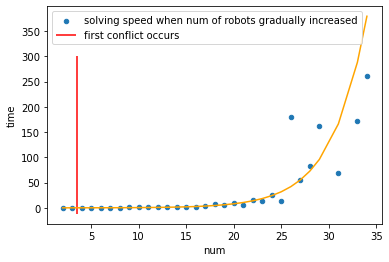

In [117]:
plotIncLog(inc_greedy1, 'time', 2, 300, 35)
plotIncLog(inc_greedy2, 'time', 4, 300, 35)
plotIncLog(inc_greedy3, 'time', 3, 300, 35)

In [ ]:
plotInc(inc_greedy1, 'init_conflicts', 7, 50, 35)
plotInc(inc_greedy2, 'init_conflicts', 2, 50, 35)
plotInc(inc_greedy3, 'init_conflicts', 3, 50, 35)